In [52]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np
import random
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [53]:
data = pd.read_csv('powerproduction.csv')

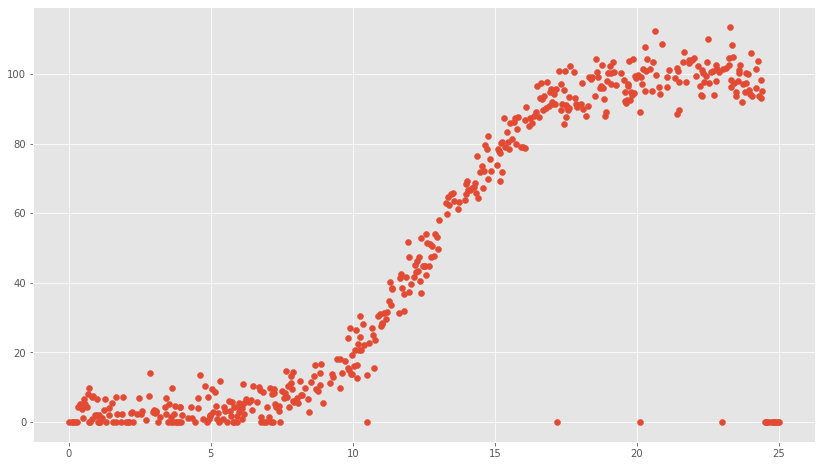

In [54]:

X = data["speed"]
Y = data["power"]

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

In [55]:
nb_degree = 3

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF = polynomial_features.fit_transform(X)

In [56]:
model = LinearRegression()

model.fit(X_TRANSF, Y)

LinearRegression()

In [57]:
Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  14.419973610973685
R2:  0.8796883953739737


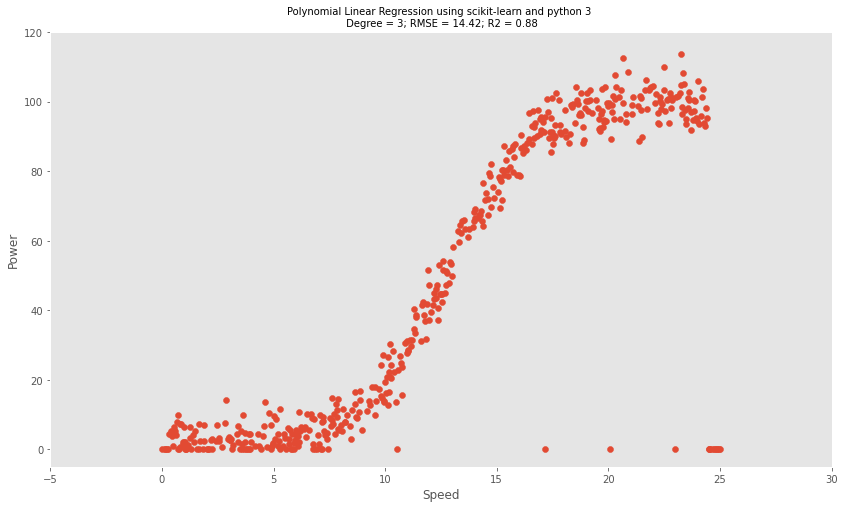

In [58]:

X_NEW = np.linspace(0, 500, 1)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)
plt.scatter(X,Y)
# plt.plot(X, Y, color='coral')

plt.grid()
plt.xlim(-5,30)
plt.ylim(-5,120)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('Speed')
plt.ylabel('Power')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()